#### ***Lecture 09***  | Template matching

In [24]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

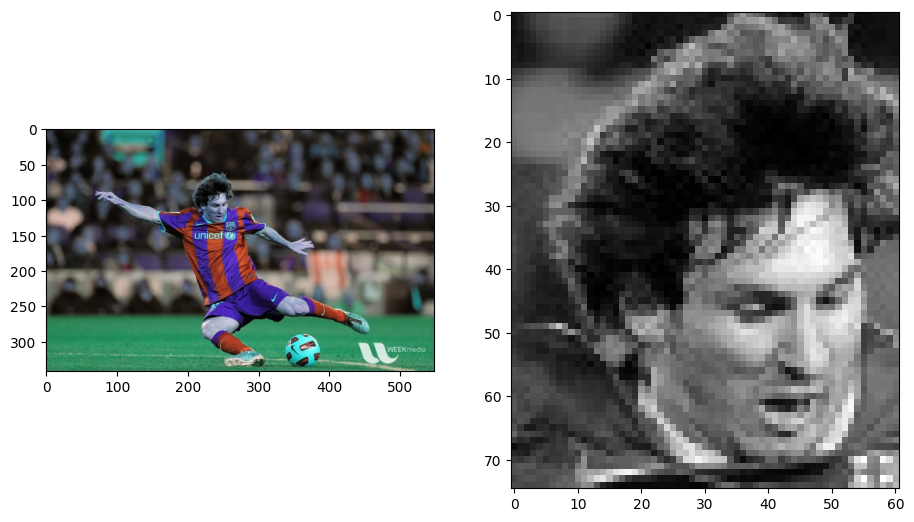

In [25]:
# Load Image
img_tmp = cv2.imread('template.jpg')
img_tmp = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2GRAY)

img = cv2.imread('messi.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize= (11, 11))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img_tmp, cmap='gray')

61 75


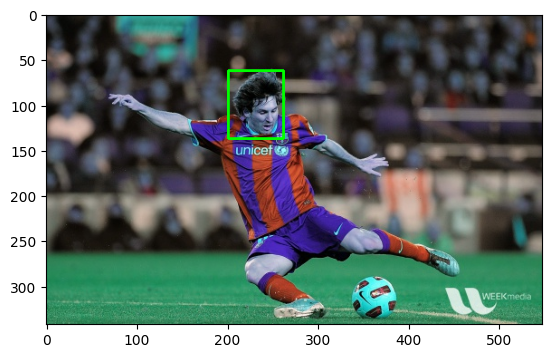

In [26]:
### --- Single Frame ---
h, w = img_tmp.shape
print(w, h)

# Apply template matching
# | method
# | orginal image
# | template image
method = cv2.TM_SQDIFF
img_res = cv2.matchTemplate(img_gray, img_tmp, method)
# Gather values
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_res)


# Draw rectangle
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

# Display
plt.imshow(img)

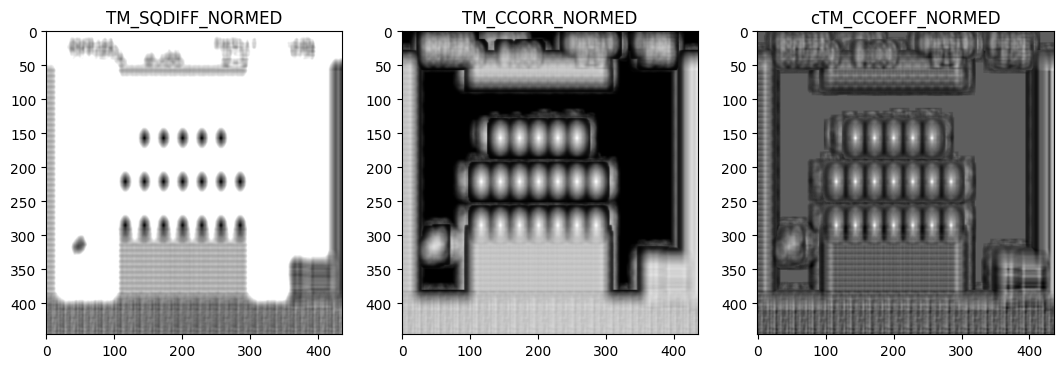

In [27]:
### --- Multiple Frame ---

# Load Image
img_tmp = cv2.imread('mario_coin.png')
img_tmp = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2GRAY)
img = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = img_tmp.shape


# Apply template matching
methods = [cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF_NORMED]
img_res = []
loc_list = []
for i, method in enumerate(methods):
    # Apply template matching for each method
    img_res.append(cv2.matchTemplate(img_gray, img_tmp, method))
    
    # Filter value
    thesh = 0.8
    loc_list.append(np.where(img_res[i] >= thesh))
    
# Display result from matching
title = ['TM_SQDIFF_NORMED', 'TM_CCORR_NORMED', 'cTM_CCOEFF_NORMED']
plt.figure(figsize= (13, 13))
for i, res in enumerate(img_res):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    plt.imshow(res, cmap= 'gray')


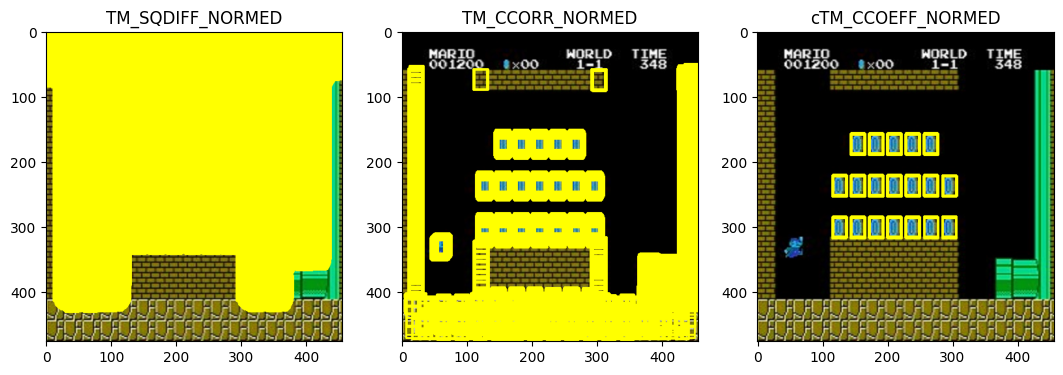

In [28]:
# Display
plt.figure(figsize= (13, 13))
for i, loc in enumerate(loc_list):
    # Duplicate image
    img_copied = img.copy()
    
    # Draw rectangle
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_copied, pt, (pt[0] + w, pt[1] + h), (255, 255, 0), 2)
    
    #Plot
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    plt.imshow(img_copied)


#### ***Lecture 09***  | Face Detection

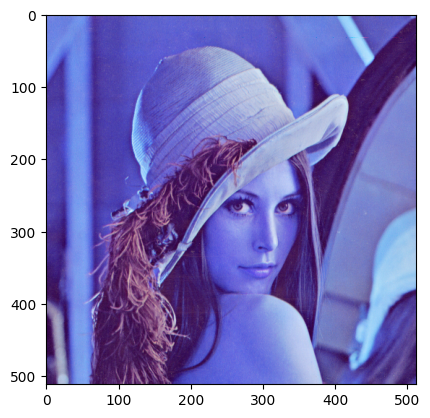

In [30]:
# Load image
img = cv2.imread('lena_color_512.tif')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)

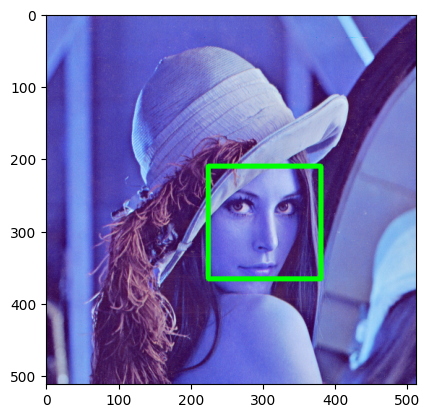

In [35]:
# Load haarcascade 
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detects face
# | img
# | scaleFactor: 
# | minNeighbors: 
# | minSize: min of face
faces = faceCascade.detectMultiScale(img_gray,
                                     scaleFactor= 1.2,
                                     minNeighbors= 5,
                                     minSize= (20, 20))

# Draw rectangle around face
for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
    
# Display
plt.imshow(img)